# Exploring Markov Decision Processes (MDPs) Through a Gridworld Example

This notebook takes us through a gridworld explorer that allows us to see how states and actions affect transitions. This is also useful for observing reward dynamics and terminations, and helps us understand stochastic transitions in action. 

## Setup

In [1]:
import sys
import os
sys.path.append("../")
from utils.gridworld import Gridworld
from utils.gridworld_solver import value_iteration
from utils.plot_utils import plot_value_heatmap, plot_policy_arrows

import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2
    
env = Gridworld(size=5, start=0, goal=24, traps=[6, 11, 18])


## Visualize the Grid

In [2]:
def draw_grid(state, env):
    grid = np.full((env.size, env.size), ".", dtype=str)
    #mark goal and traps
    goal_pos = env.state_to_pos(env.goal)
    grid[goal_pos] = "G"
    for trap in env.traps:
        trap_pos = env.state_to_pos(trap)
        grid[trap_pos] = "X"

    #mark agent's position
    agent_pos = env.state_to_pos(state)
    if grid[agent_pos] == ".":
        grid[agent_pos] = "A"
    else:
        grid[agent_pos] += "/A"
        
    print("\nGrid:")
    for row in grid:
        print(" ".join(row))

## Run Episode Manually

In [3]:
state = env.reset()
draw_grid(state, env)

for t in range(20):
    action = int(input("Action (0=up, 1=right, 2=down, 3=left): "))
    next_state, reward, done = env.step(action)
    draw_grid(next_state, env)
    print(f"Step {t+1} - Reward: {reward}")
    if done:
        print("Episode finished.")
        break


Grid:
A . . . .
. X . . .
. X . . .
. . . X .
. . . . G


Action (0=up, 1=right, 2=down, 3=left):  1



Grid:
. A . . .
. X . . .
. X . . .
. . . X .
. . . . G
Step 1 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  1



Grid:
. . A . .
. X . . .
. X . . .
. . . X .
. . . . G
Step 2 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  1



Grid:
. . . A .
. X . . .
. X . . .
. . . X .
. . . . G
Step 3 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  1



Grid:
. . . . A
. X . . .
. X . . .
. . . X .
. . . . G
Step 4 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  2



Grid:
. . . . A
. X . . .
. X . . .
. . . X .
. . . . G
Step 5 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  2



Grid:
. . . . .
. X . . A
. X . . .
. . . X .
. . . . G
Step 6 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  2



Grid:
. . . . .
. X . . .
. X . . A
. . . X .
. . . . G
Step 7 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  2



Grid:
. . . . .
. X . . .
. X . . .
. . . X A
. . . . G
Step 8 - Reward: -1


Action (0=up, 1=right, 2=down, 3=left):  2



Grid:
. . . . .
. X . . .
. X . . .
. . . X .
. . . . G
Step 9 - Reward: 10
Episode finished.


## Solve Using Value Iteration

In [4]:
V, policy = value_iteration(env)

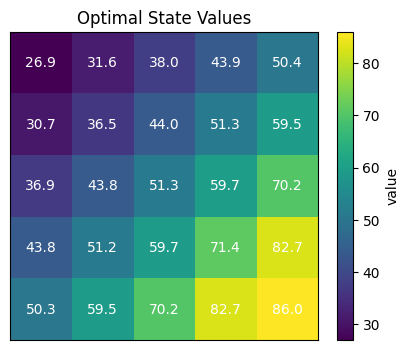

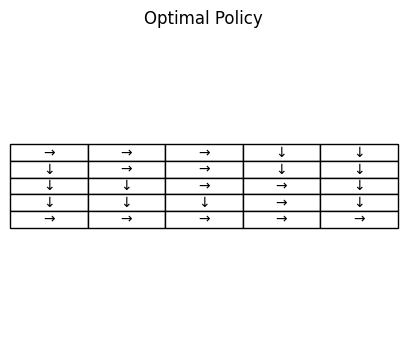

In [5]:
# visualize results
plot_value_heatmap(V, env, title="Optimal State Values")
plot_policy_arrows(policy, env, title="Optimal Policy")